In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv("../Final.csv")
df.head()

,N,p_m,p_c,tournament_size,iteration,generation,average_fitness,best_fitness,best_genome,solution_found,num_solutions_found,diversity_metric
0,25,0.0,0.0,2,1,1,0.153785,0.862935,1111110001000000111110101100001010100100,0,0,4.07226
1,25,0.0,0.0,2,1,2,0.256632,0.862935,1111110001000000111110101100001010100100,0,0,3.51628
2,25,0.0,0.0,2,1,3,0.278787,0.862935,1111110001000000111110101100001010100100,0,0,3.25890
3,25,0.0,0.0,2,1,4,0.443280,0.862935,1111110001000000111110101100001010100100,0,0,2.28967
4,25,0.0,0.0,2,1,5,0.632327,0.862935,1111110001000000111110101100001010100100,0,0,2.17945


In [19]:
# Default parameters
d_N = 50
d_pm = 0.01
d_pc = 0.3
d_tournament_size = 2

# Function to plot fitness trends
def plot_fitness(parameter, values, fitness_type="average_fitness"):
   
    plt.figure(figsize=(7.5, 4.5))

    for val in values:
        filtered = pd.DataFrame()
        if parameter == "N":
            filtered = df[(df[parameter] == val) & (df["p_m"] == d_pm) & (df["p_c"] == d_pc) & (df["tournament_size"] == d_tournament_size)]
        elif parameter == "p_m":
            filtered = df[(df[parameter] == val) & (df["N"] == d_N) & (df["p_c"] == d_pc) & (df["tournament_size"] == d_tournament_size)]
        elif parameter == "p_c":
            filtered = df[(df[parameter] == val) & (df["p_m"] == d_pm) & (df["N"] == d_N) & (df["tournament_size"] == d_tournament_size)]
        else:
            filtered = df[(df[parameter] == val) & (df["p_m"] == d_pm) & (df["p_c"] == d_pc) & (df["N"] == d_N)]

        # Aggregate runs if multiple iterations exist
        mean_values = filtered.groupby("generation")[fitness_type].mean()
        std_values = filtered.groupby("generation")[fitness_type].std()

        plt.plot(mean_values.index, mean_values, label=f"{parameter}={val}")
        plt.fill_between(mean_values.index, mean_values - std_values, mean_values + std_values, alpha=0.2)

    plt.xlabel("Generation")
    plt.ylabel(f"{fitness_type.replace('_', ' ').title()}")
    plt.title(f"{parameter} and {fitness_type.replace('_', ' ').title()}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"../graphs/{parameter}_{fitness_type}.png")
    plt.show()

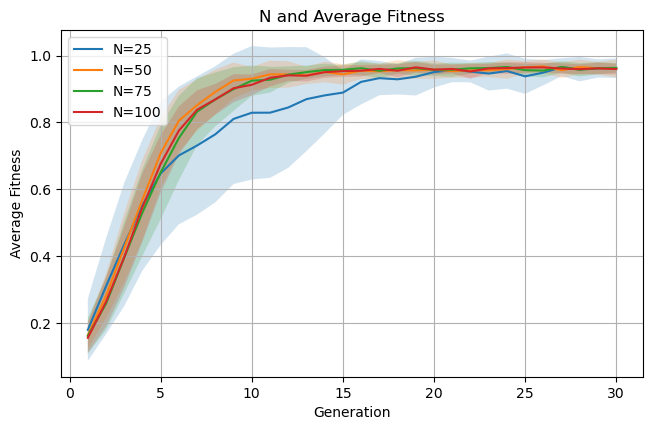

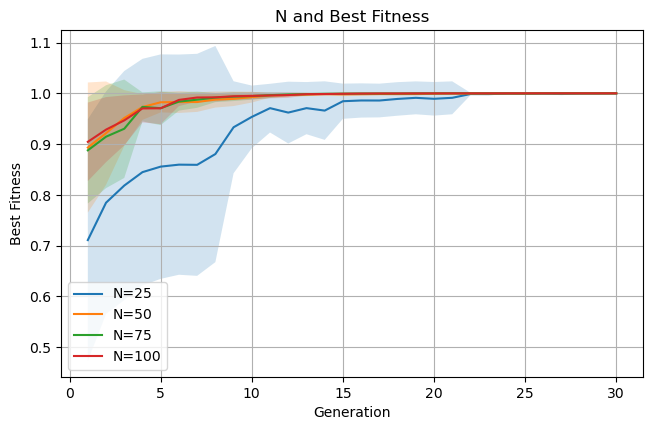

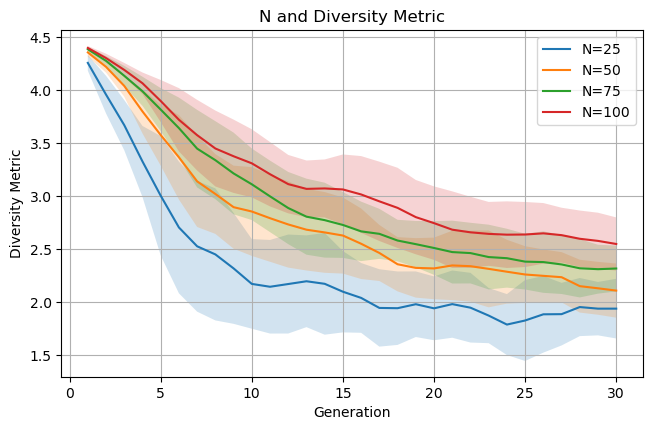

In [20]:
plot_fitness("N", [25, 50, 75, 100], fitness_type="average_fitness")
plot_fitness("N", [25, 50, 75, 100], fitness_type="best_fitness")
plot_fitness("N", [25, 50, 75, 100], fitness_type="diversity_metric")

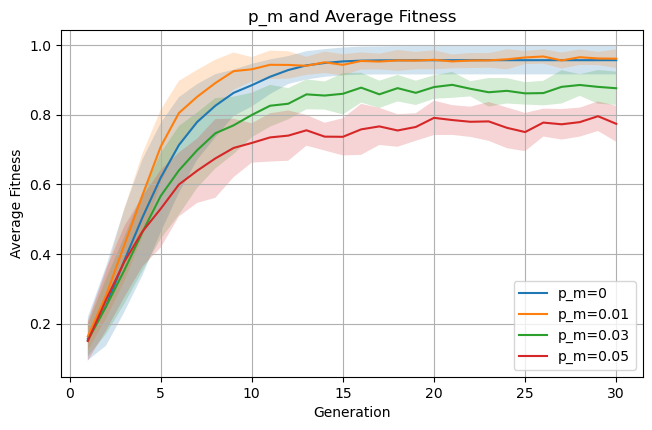

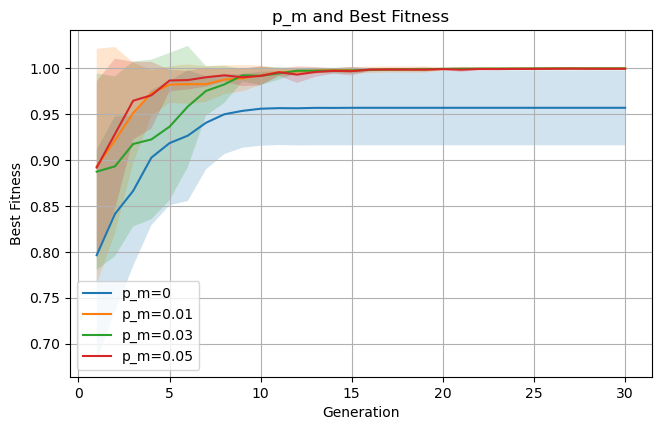

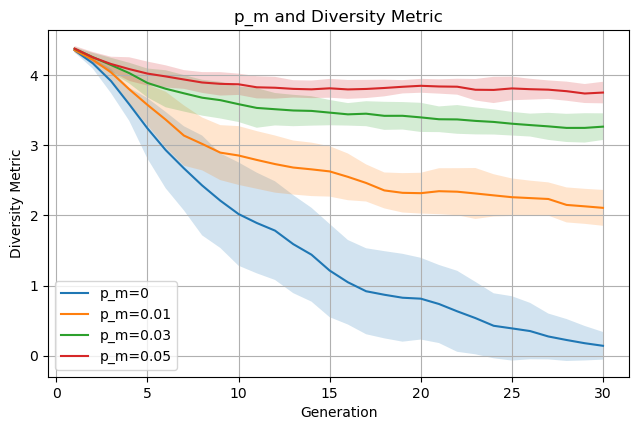

In [21]:
plot_fitness("p_m", [0, 0.01, 0.03, 0.05], fitness_type="average_fitness")
plot_fitness("p_m", [0, 0.01, 0.03, 0.05], fitness_type="best_fitness")
plot_fitness("p_m", [0, 0.01, 0.03, 0.05], fitness_type="diversity_metric")

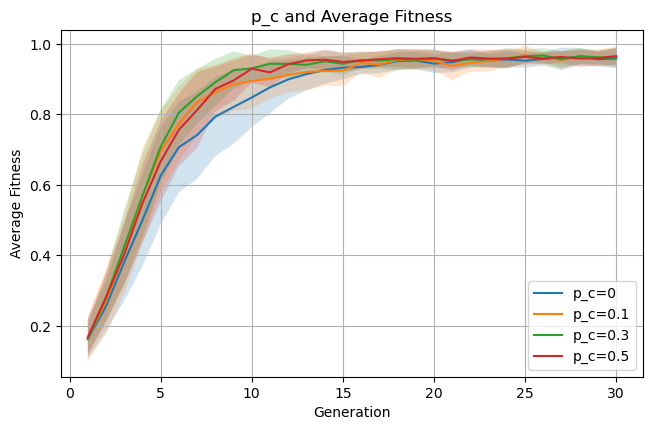

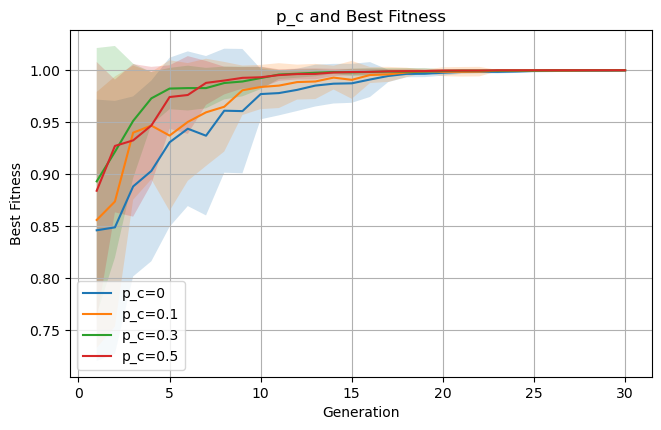

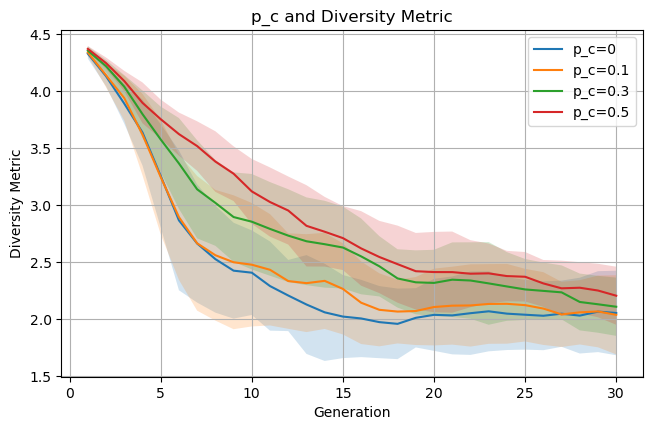

In [22]:
plot_fitness("p_c", [0, 0.1, 0.3, 0.5], fitness_type="average_fitness")
plot_fitness("p_c", [0, 0.1, 0.3, 0.5], fitness_type="best_fitness")
plot_fitness("p_c", [0, 0.1, 0.3, 0.5], fitness_type="diversity_metric")

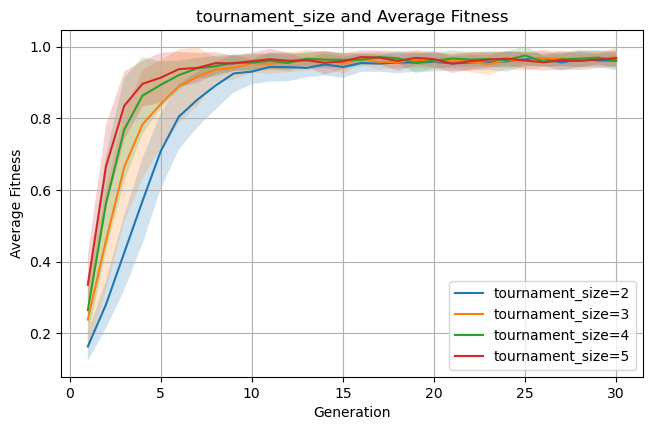

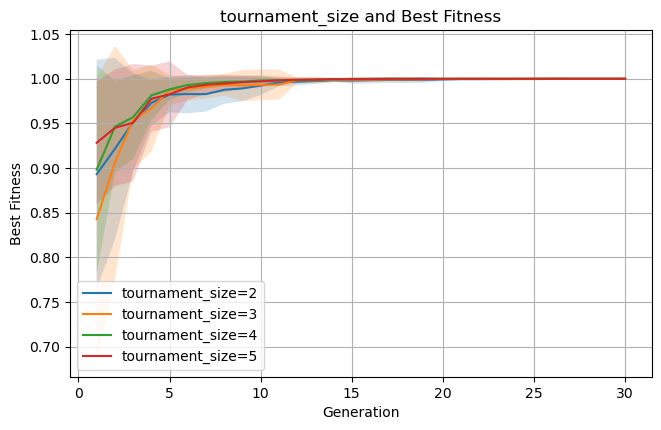

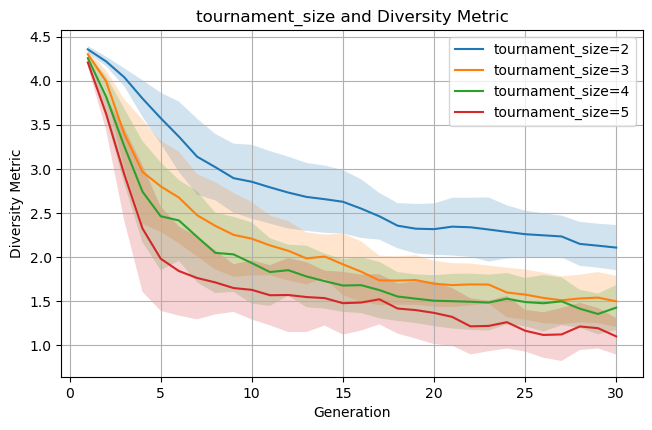

In [23]:
plot_fitness("tournament_size", [2, 3, 4, 5], fitness_type="average_fitness")
plot_fitness("tournament_size", [2, 3, 4, 5], fitness_type="best_fitness")
plot_fitness("tournament_size", [2, 3, 4, 5], fitness_type="diversity_metric")